# Tools

In [11]:
!pip install jdatetime

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jdatetime

# Dataset

In [13]:
df = pd.read_csv("https://drive.google.com/uc?id=16Lc2GSNvvYXvnAHYGAOfv-Ed2o-rh_uO")

In [14]:
df.head()

,user_id,transaction_id,transaction_date,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items
0,1,1,1403-01-01,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1
1,1,2,1403-01-02,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1
2,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2
3,1,3,1403-01-03,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2
4,1,4,1403-01-04,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           8192 non-null   int64  
 1   transaction_id    8192 non-null   int64  
 2   transaction_date  8192 non-null   object 
 3   transaction_time  8192 non-null   object 
 4   store             8192 non-null   object 
 5   product_name      8192 non-null   object 
 6   quantity          8192 non-null   int64  
 7   unit_price        8192 non-null   float64
 8   total_price       8192 non-null   float64
 9   total_amount      8192 non-null   float64
 10  total_items       8192 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 704.1+ KB


In [16]:
df.shape

(8192, 11)

In [34]:
df.describe()

,user_id,transaction_id,quantity,unit_price,total_price,total_amount,total_items,datetime,hour
count,8192.000000,8192.000000,8192.000000,8.192000e+03,8.192000e+03,8.192000e+03,8192.000000,8192,8192.000000
mean,6.557617,161.153320,2.965576,2.170055e+06,3.426030e+06,6.339663e+06,8.775513,2024-07-06 09:18:00.413208064,11.437988
min,1.000000,1.000000,1.000000,5.013100e+03,5.035480e+03,7.839930e+03,1.000000,2024-03-20 00:01:32,0.000000
25%,4.000000,81.000000,1.000000,8.416818e+04,1.853002e+05,8.157042e+05,3.000000,2024-05-12 18:48:29.750000128,5.000000
50%,7.000000,161.000000,2.000000,2.872106e+05,5.467666e+05,1.944458e+06,5.000000,2024-07-06 22:05:03,11.000000
75%,10.000000,242.000000,3.000000,9.350427e+05,1.939030e+06,4.701880e+06,10.000000,2024-08-28 17:05:54,18.000000
max,12.000000,348.000000,48.000000,4.999451e+07,1.406411e+08,1.406411e+08,50.000000,2024-10-20 23:01:37,23.000000
std,3.468765,93.056739,3.949849,6.191959e+06,9.584929e+06,1.393022e+07,9.698697,NaN,6.995145


In [17]:
df.isnull().sum()

,0
user_id,0
transaction_id,0
transaction_date,0
transaction_time,0
store,0
product_name,0
quantity,0
unit_price,0
total_price,0
total_amount,0


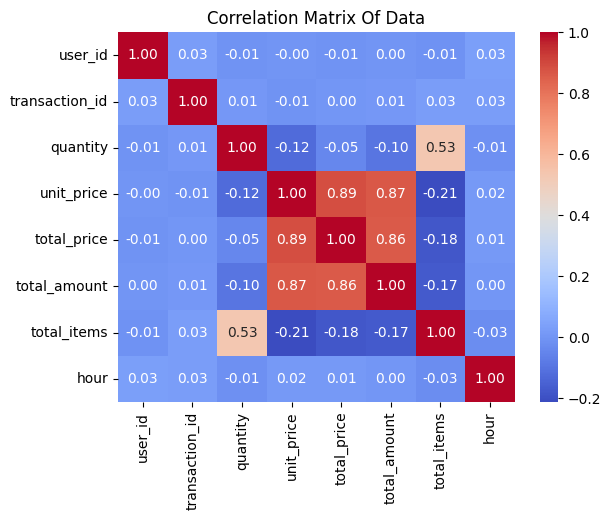

In [66]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Of Data')

# plt.savefig("Correlation Matrix Of Data.png", dpi=300, bbox_inches='tight')
plt.show()

# <b> Step 1

# Shamsi to Miladi (Gregorian)

In [18]:
def shamsi_to_miladi(shamsi_date):
    year, month, day = map(int, shamsi_date.split('-'))
    jalali_date = jdatetime.date(year, month, day)
    miladi_date = jalali_date.togregorian()
    return miladi_date

In [19]:
df['transaction_date_miladi'] = df['transaction_date'].apply(shamsi_to_miladi)

In [20]:
df['transaction_date_miladi']

,transaction_date_miladi
0,2024-03-20
1,2024-03-21
2,2024-03-22
3,2024-03-22
4,2024-03-23
...,...
8187,2024-10-16
8188,2024-10-18
8189,2024-10-18
8190,2024-10-18


In [21]:
df.drop(columns=['transaction_date'], inplace=True)

In [22]:
df

,user_id,transaction_id,transaction_time,store,product_name,quantity,unit_price,total_price,total_amount,total_items,transaction_date_miladi
0,1,1,23:38:58,Jewelry Store,Jewelry Store Product 38,1,1658456.89,1658456.89,1658456.89,1,2024-03-20
1,1,2,16:41:29,Electronics Store,Electronics Store Product 82,1,1462060.36,1462060.36,1462060.36,1,2024-03-21
2,1,3,07:45:32,Cosmetics Store,Cosmetics Store Product 26,1,105516.10,105516.10,323033.43,2,2024-03-22
3,1,3,07:45:32,Cosmetics Store,Cosmetics Store Product 17,1,217517.33,217517.33,323033.43,2,2024-03-22
4,1,4,15:22:12,Hardware Store,Hardware Store Product 40,1,1949500.13,1949500.13,6191593.89,6,2024-03-23
...,...,...,...,...,...,...,...,...,...,...,...
8187,12,306,13:23:31,Supermarket,Supermarket Product 125,7,44641.46,312490.22,1712890.34,31,2024-10-16
8188,12,307,08:10:55,Music Store,Music Store Product 10,4,71906.99,287627.96,404626.76,5,2024-10-18
8189,12,307,08:10:55,Music Store,Music Store Product 34,1,116998.80,116998.80,404626.76,5,2024-10-18
8190,12,308,22:01:02,Cosmetics Store,Cosmetics Store Product 13,9,445439.80,4008958.20,4008958.20,9,2024-10-18


# Pre-processing

In [24]:
df['transaction_date_miladi'] = df['transaction_date_miladi'].astype(str)

In [25]:
df['datetime'] = pd.to_datetime(df['transaction_date_miladi'] + ' ' + df['transaction_time'])

In [26]:
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

# Analysis by day of the week

Number of transactions per day of the week:
day_of_week
Friday       1148
Monday       1124
Saturday     1320
Sunday       1116
Thursday     1080
Tuesday      1164
Wednesday    1240
Name: count, dtype: int64


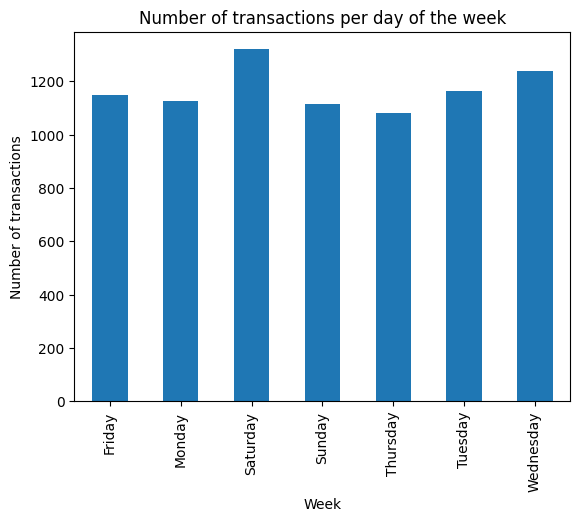

In [65]:
transactions_by_day = df['day_of_week'].value_counts().sort_index()
print("Number of transactions per day of the week:")
print(transactions_by_day)
transactions_by_day.plot(kind='bar', title='Number of transactions per day of the week')
plt.xlabel('Week')
plt.ylabel('Number of transactions')

# plt.savefig("Number of transactions per day of the week.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
busiest_day = transactions_by_day.idxmax()
max_transactions_day = transactions_by_day.max()

print(f"The highest number of transactions, {max_transactions_day}, was made on {busiest_day}.")


The highest number of transactions, 1320, was made on Saturday.


# Analysis based on time of day

Number of transactions per hour of the day:
hour
0     362
1     323
2     355
3     349
4     360
5     348
6     383
7     338
8     307
9     393
10    299
11    340
12    349
13    357
14    300
15    258
16    311
17    391
18    328
19    338
20    320
21    378
22    348
23    357
Name: count, dtype: int64


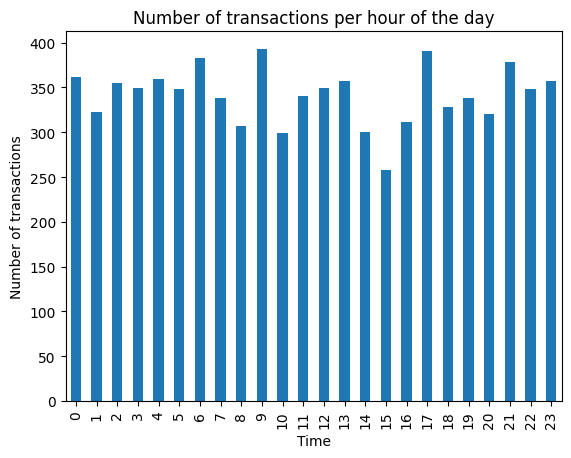

In [64]:
transactions_by_hour = df['hour'].value_counts().sort_index()
print('Number of transactions per hour of the day:')
print(transactions_by_hour)
transactions_by_hour.plot(kind='bar', title='Number of transactions per hour of the day')
plt.xlabel('Time')
plt.ylabel('Number of transactions')

# plt.savefig("Number of transactions per hour of the day.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
busiest_hour = transactions_by_hour.idxmax()
max_transactions_hour = transactions_by_hour.max()

print(f"The highest number of transactions, {max_transactions_hour}, was made at {busiest_hour}.")


The highest number of transactions, 393, was made at 9.


<b> Q1. Is there a specific pattern when customers buy?</b><br>
yes, <br>
most transactions are done on Saturday. <br>
most transactions are done at 9am.

# <b> Step 2

# Displaying outliers

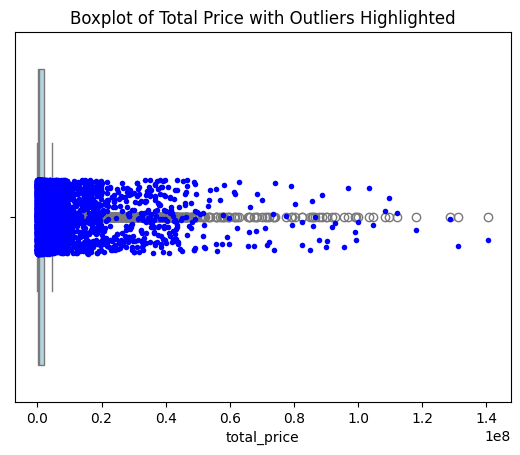

Number of column data'total_price': 8192
Number of outliers: 1186


In [63]:
# Boxplot
sns.boxplot(x=df['total_price'], color='lightblue')
sns.stripplot(x=df['total_price'], color='blue', size=4, jitter=True)
plt.title("Boxplot of Total Price with Outliers Highlighted")

# plt.savefig("Boxplot of Total Price with Outliers Highlighted.png", dpi=300, bbox_inches='tight')
plt.show()

# Finding outliers using IQR
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_price'] < lower_bound) | (df['total_price'] > upper_bound)]['total_price']

print(f"Number of column data'total_price': {len(df['total_price'])}")
print(f"Number of outliers: {len(outliers)}")


# Calculating total sales and sorting stores

In [52]:
total_items_by_store = df.groupby('store')['total_price'].sum()
total_items_by_store = total_items_by_store.sort_values(ascending=False)

# Show top 10 stores with the highest sales

In [53]:
print("Top ten stores with the most items sold:")
print(total_items_by_store.head(10))

Top ten stores with the most items sold:
store
Jewelry Store           1.226038e+10
Home Appliance Store    4.831257e+09
Electronics Store       3.855097e+09
Clothing Store          1.476769e+09
Furniture Store         1.389610e+09
Hardware Store          9.986125e+08
Chain Store             8.477238e+08
Sporting Goods Store    5.665938e+08
Supermarket             3.942086e+08
Toy Store               3.754816e+08
Name: total_price, dtype: float64


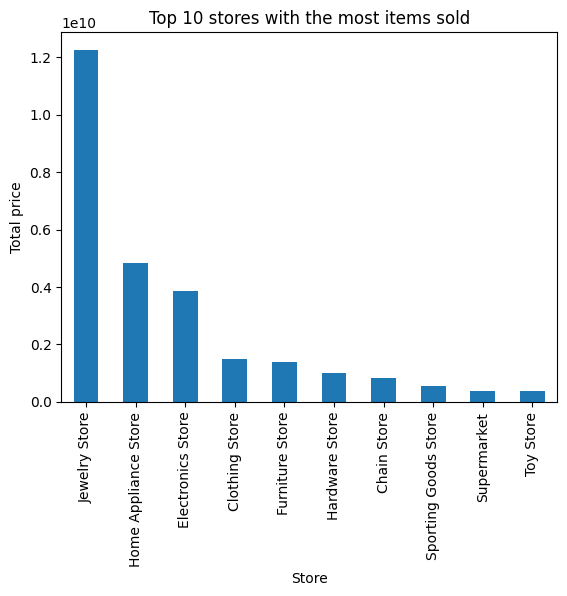

In [72]:
total_items_by_store.head(10).plot(kind='bar', title='Top 10 stores with the most items sold')
plt.xlabel('Store')
plt.ylabel('Total price')


# plt.savefig("Top 10 stores with the most items sold.png", dpi=300, bbox_inches='tight')
plt.show()

<b> Q2. Which stores have the most sales?</b><br>
Shown in order. The Jewelry Store also has the highest sales. <br>


# <b> Step 3

# Calculating total sales and sorting products

In [55]:
total_quantity_by_product = df.groupby('product_name')['quantity'].sum()
total_quantity_by_product = total_quantity_by_product.sort_values(ascending=False)

# Show top 10 products with the highest sales

In [56]:
print("Top 10 products with the highest sales:")
print(total_quantity_by_product.head(10))

Top 10 products with the highest sales:
product_name
Supermarket Product 16     140
Supermarket Product 35     132
Supermarket Product 97     118
Supermarket Product 137    117
Supermarket Product 154    110
Supermarket Product 44     101
Supermarket Product 155    101
Supermarket Product 73     101
Supermarket Product 30      98
Supermarket Product 99      92
Name: quantity, dtype: int64


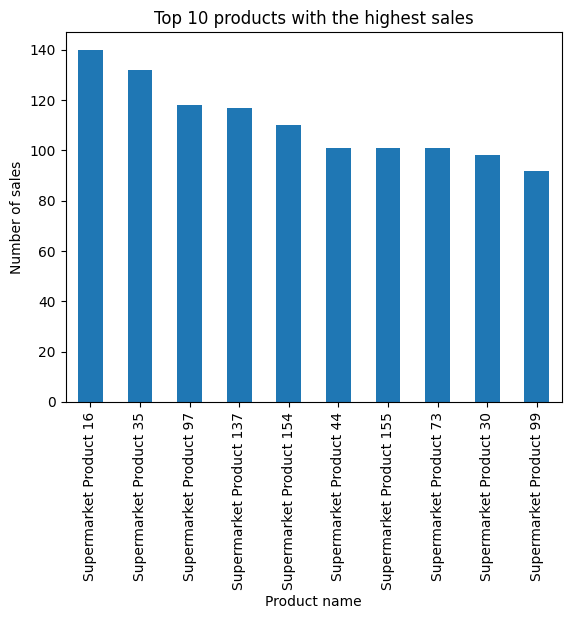

In [68]:
total_quantity_by_product.head(10).plot(kind='bar', title='Top 10 products with the highest sales')
plt.xlabel('Product name')
plt.ylabel('Number of sales')

# plt.savefig("Top 10 products with the highest sales.png", dpi=300, bbox_inches='tight')
plt.show()

<b> Q3. What are the best-selling products?</b><br>
Shown in order. Supermarket Product 16 is also the best-selling product. <br>